In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
#Data Inbalance should be taken care with SMOTE
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [3]:
X=df.drop(columns="quality")
y=df[['quality']]


In [4]:
numerical_cols=[i for i in X.columns if X[i].dtype=="int64" or X[i].dtype=="float"]

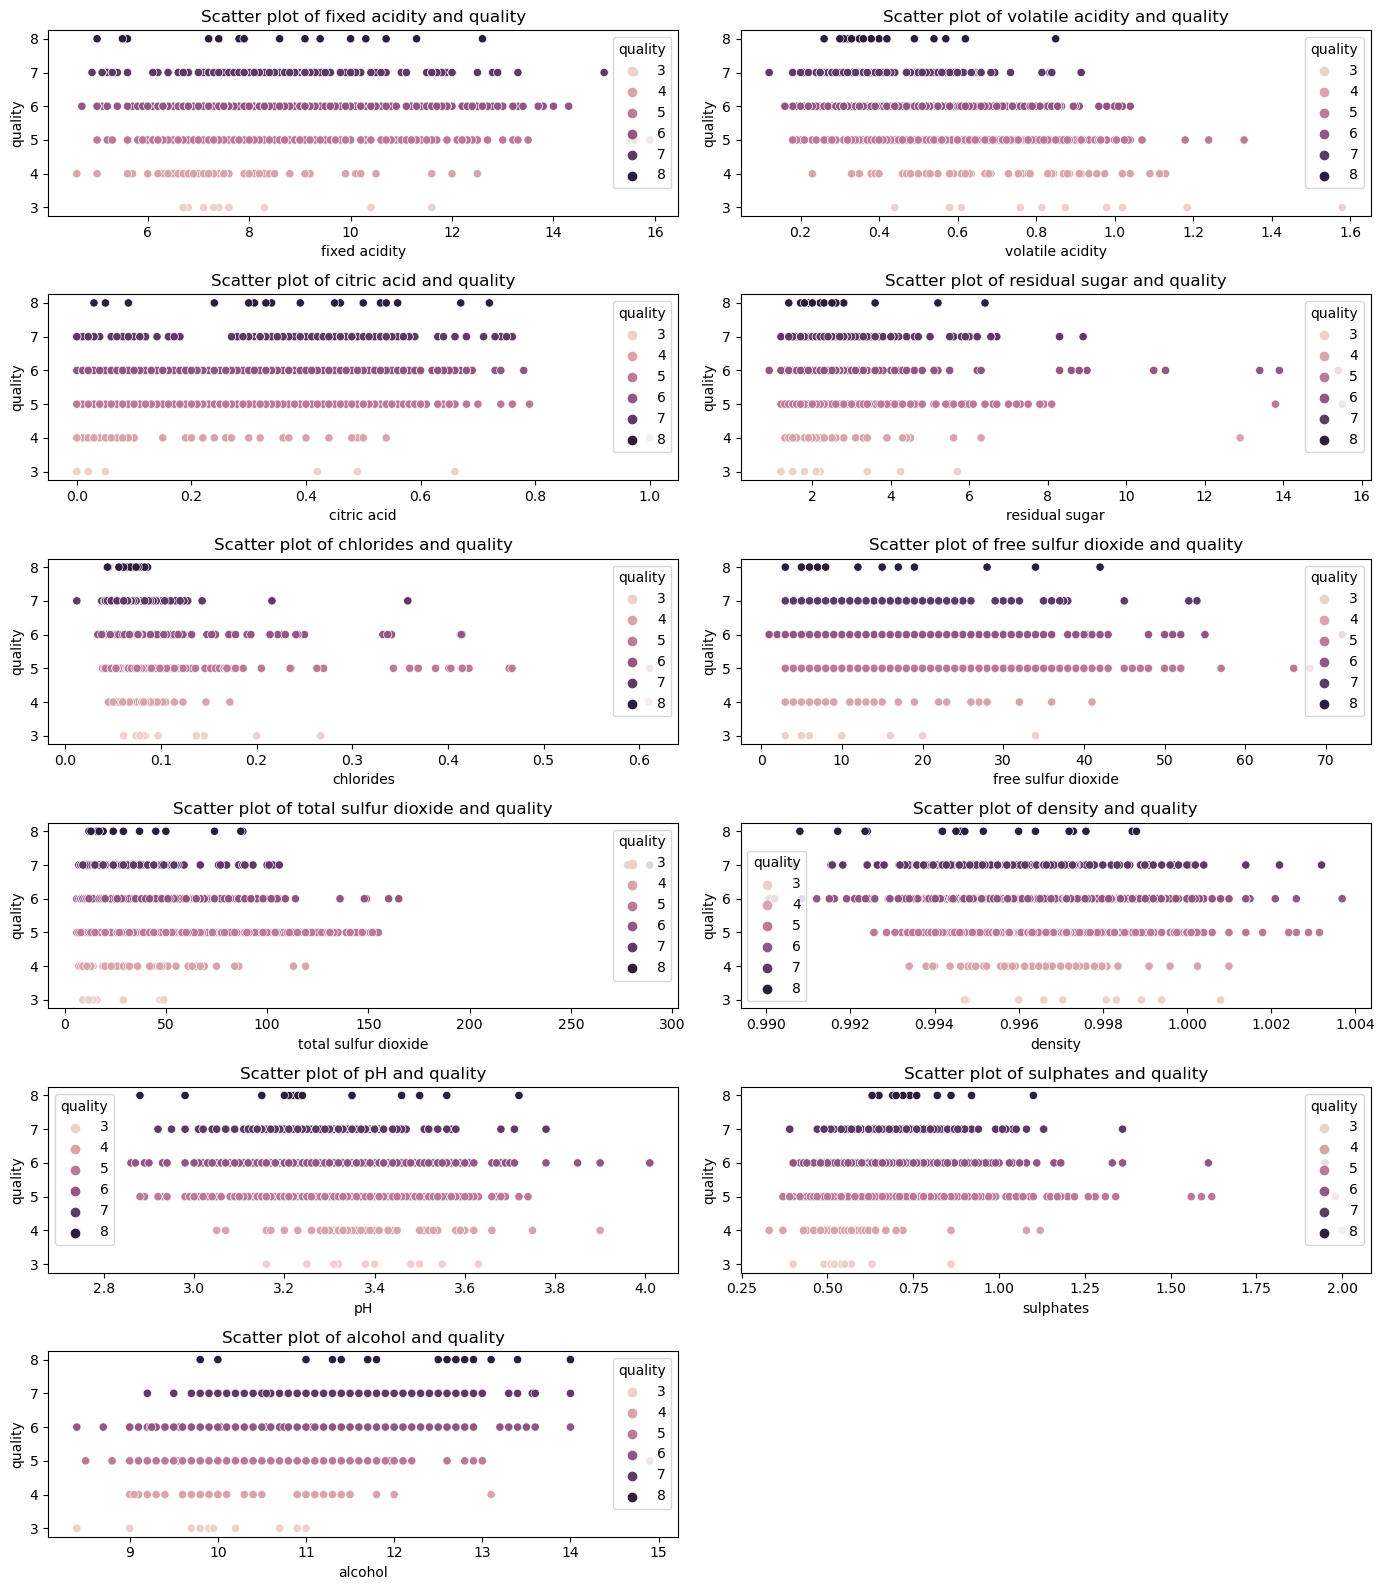

In [26]:

plt.figure(figsize=(14, 16))  # Adjust the figure size

for idx, col in enumerate(numerical_cols, start=1):
    plt.subplot(6, 2, idx)
    plt.title(f"Scatter plot of {col} and quality")
    sn.scatterplot(data=df, x=col, y="quality", hue="quality")

plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing between subplots

plt.tight_layout()
plt.show()

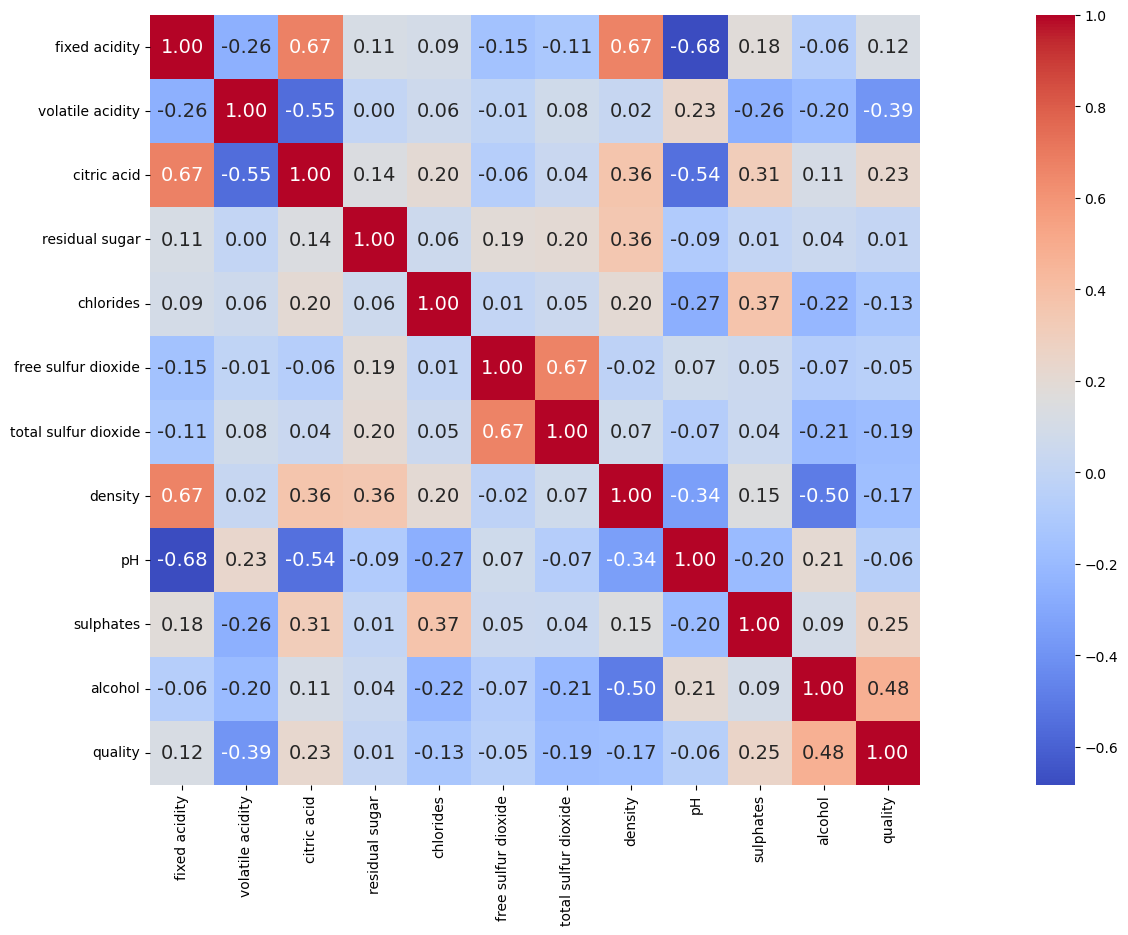

In [33]:
correlation_matrix=df.corr()
plt.figure(figsize=(30,10))
sn.heatmap(correlation_matrix,fmt=".2f",annot_kws={"size":14},cmap="coolwarm",square=True,annot=True)
plt.show()

In [34]:
#This is a muliclassification problem
#We will use mulitple algorithms

In [36]:
!pip install imblearn

In [ ]:
!pip install xgboost

     -------------------------------------- 99.8/99.8 MB 316.3 kB/s eta 0:00:00


In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [25]:
smote=SMOTE(random_state=5)
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [26]:
y_smote.value_counts()

quality
3          529
4          529
5          529
6          529
7          529
8          529
dtype: int64

# First we will try SVC with different kernel
## Regularising it as much as possible



In [13]:
svm_linear=SVC(C=1,kernel="linear")

In [17]:
y_smote

,quality
0,6
1,6
2,4
3,6
4,5
...,...
3169,8
3170,8
3171,8
3172,8


In [26]:
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.preprocessing import StandardScaler


In [25]:
svm_preds = {}

kernels = ["linear", "poly", "rbf"]
for kernel in kernels:
    svmmodel = SVC(C=1, kernel=kernel)
    svmmodel.fit(x_smote, y_smote['quality'])
    preds = svmmodel.predict(x_test)
    
    accuracy = accuracy_score(y_test, preds)
    
    # Store results for each kernel separately in svm_preds dictionary
    svm_preds[kernel] = accuracy

# Print svm_preds dictionary containing accuracies for each kernel
print(svm_preds)

{'linear': 0.434375, 'poly': 0.2375, 'rbf': 0.38125}


In [28]:
#linear model is giving a higher accuracy indicating the the data is linearly seperable 
#We will try out some more models fast and come back and try with scaling if required
#We can do feature elimination as well but lets see if any algos give more than 70% accuarcy

In [40]:
models = [
    ('DecisionTree', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('RandomForest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('XGBoost', xgboost.XGBClassifier()),
    ('GaussianNB', MultinomialNB()),
    ('KNeighbors', KNeighborsClassifier())
]
from sklearn.metrics import f1_score

In [46]:
y_test['quality']

236     6
833     4
424     5
982     6
1155    5
       ..
935     6
1500    5
748     6
1373    5
187     5
Name: quality, Length: 320, dtype: int64

In [55]:
y_smote_transformed = y_smote['quality'] - min(y_smote['quality'])
y_test_transformed=y_test['quality'] - min(y_smote['quality'])

In [56]:

results = {}
# Loop through each model, train, and store performance metrics in the results dictionary
for name, model in models:
    # Train the model
    model.fit(x_smote, y_smote_transformed)  # Replace X_train, y_train with your actual training data
    
    # Make predictions on the test set
    y_pred = model.predict(x_test)  # Replace X_test with your test data
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test_transformed, y_pred)
    f1 = f1_score(y_test_transformed, y_pred, average='weighted')
    
    # Store results in the dictionary
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Print the results dictionary
print(results)

{'DecisionTree': {'Accuracy': 0.603125, 'F1 Score': 0.6250735314741301}, 'SVM': {'Accuracy': 0.38125, 'F1 Score': 0.4226386389724116}, 'RandomForest': {'Accuracy': 0.690625, 'F1 Score': 0.7018925775413302}, 'AdaBoost': {'Accuracy': 0.253125, 'F1 Score': 0.2587266486345393}, 'GradientBoosting': {'Accuracy': 0.61875, 'F1 Score': 0.6396275029446408}, 'XGBoost': {'Accuracy': 0.7, 'F1 Score': 0.7092105518081273}, 'GaussianNB': {'Accuracy': 0.353125, 'F1 Score': 0.39877995674538225}, 'KNeighbors': {'Accuracy': 0.396875, 'F1 Score': 0.451532456959845}}


In [57]:
results

{'DecisionTree': {'Accuracy': 0.603125, 'F1 Score': 0.6250735314741301},
 'SVM': {'Accuracy': 0.38125, 'F1 Score': 0.4226386389724116},
 'RandomForest': {'Accuracy': 0.690625, 'F1 Score': 0.7018925775413302},
 'AdaBoost': {'Accuracy': 0.253125, 'F1 Score': 0.2587266486345393},
 'GradientBoosting': {'Accuracy': 0.61875, 'F1 Score': 0.6396275029446408},
 'XGBoost': {'Accuracy': 0.7, 'F1 Score': 0.7092105518081273},
 'GaussianNB': {'Accuracy': 0.353125, 'F1 Score': 0.39877995674538225},
 'KNeighbors': {'Accuracy': 0.396875, 'F1 Score': 0.451532456959845}}

In [58]:
# We have selected Random Forest and XGBoost for further usage
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


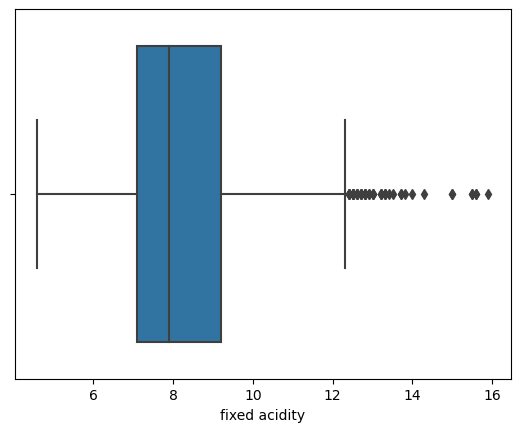

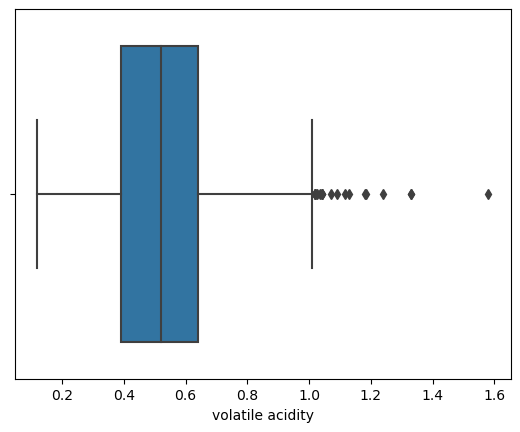

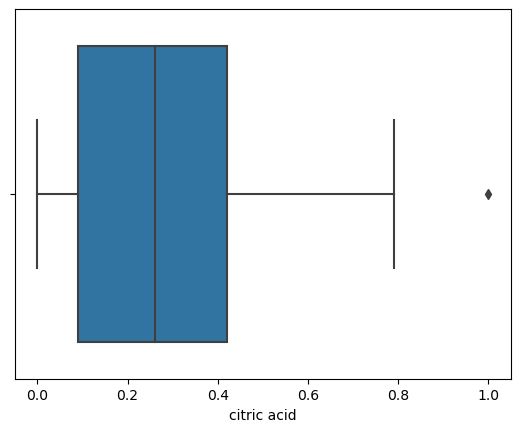

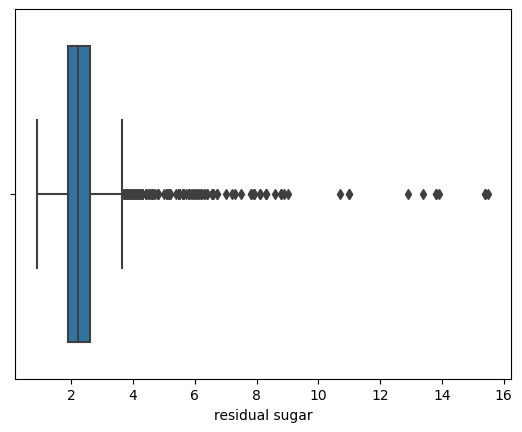

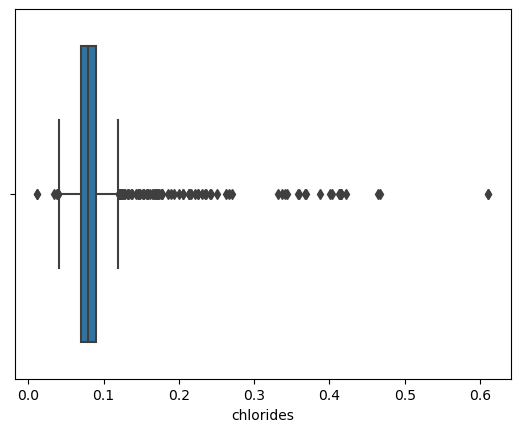

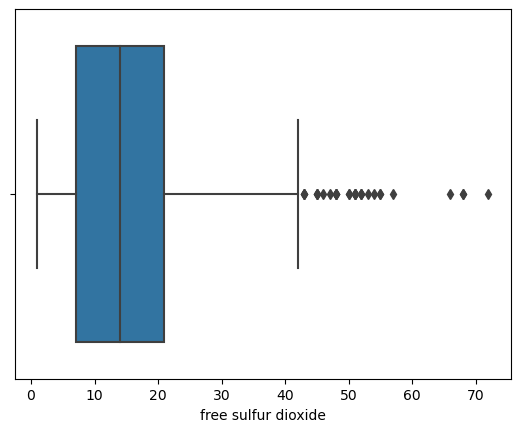

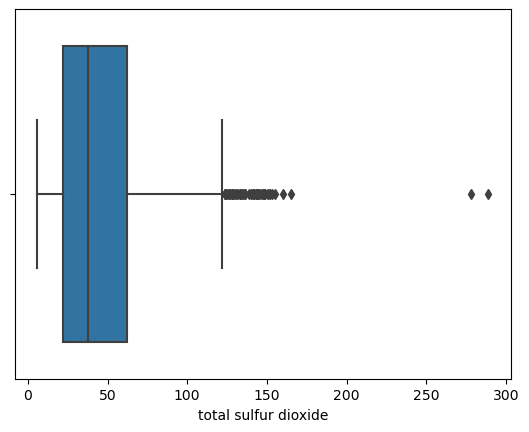

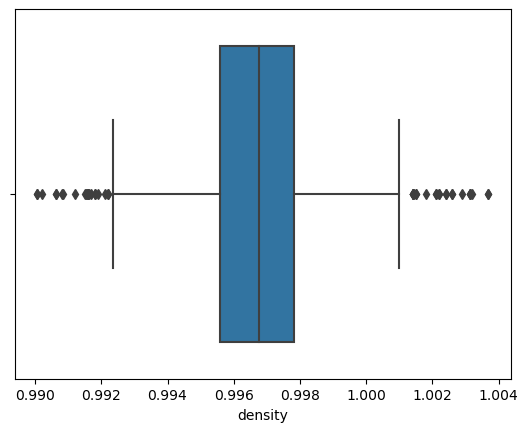

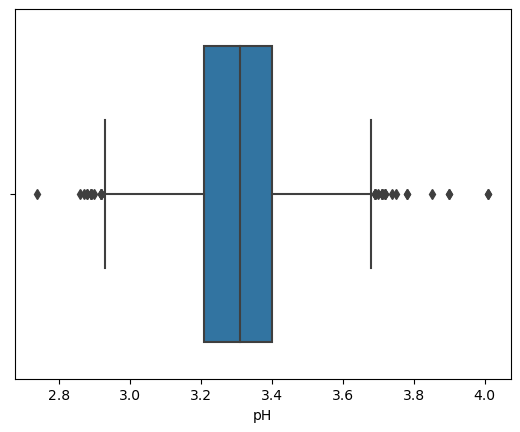

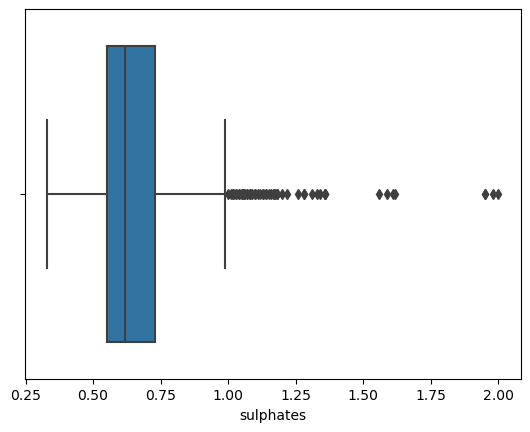

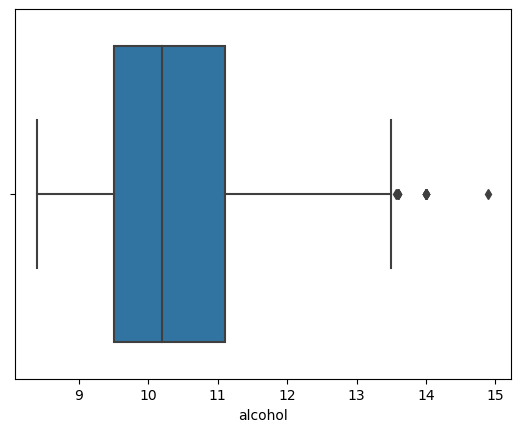

In [65]:
for i in numerical_cols:
    sn.boxplot(x=df[i]) 
    plt.show()

In [73]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [74]:
for col in numerical_cols:
    df_new = remove_outliers_iqr(df, col)

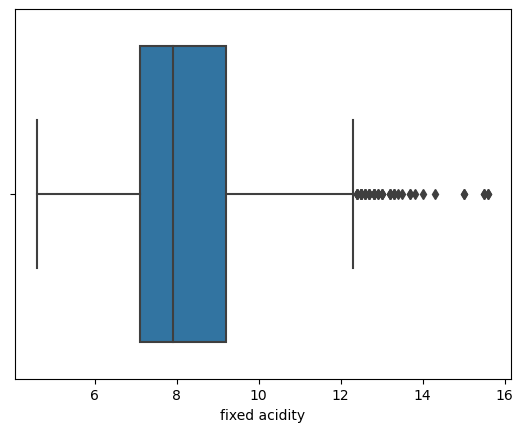

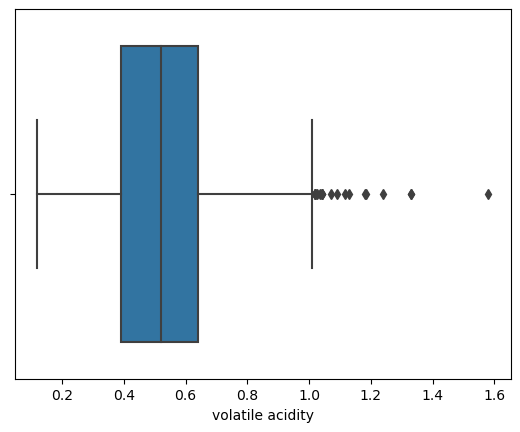

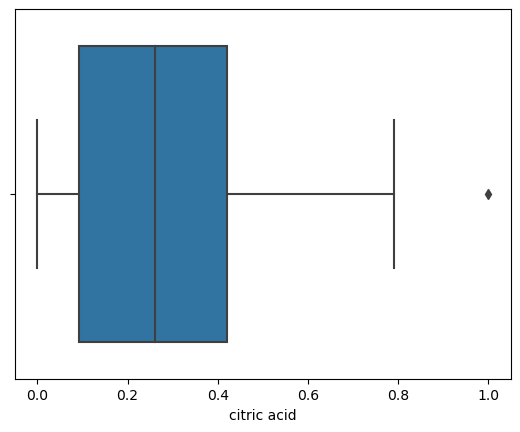

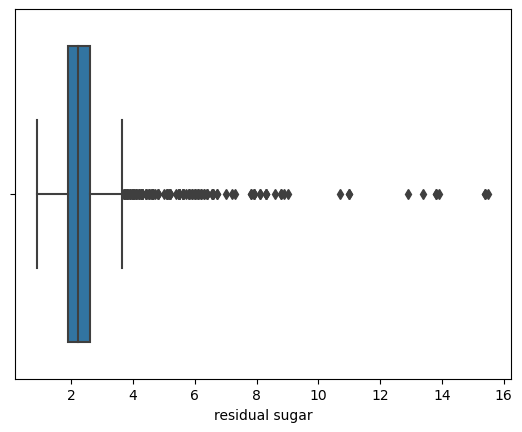

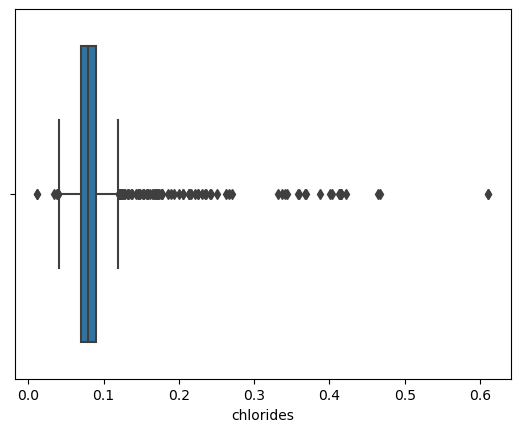

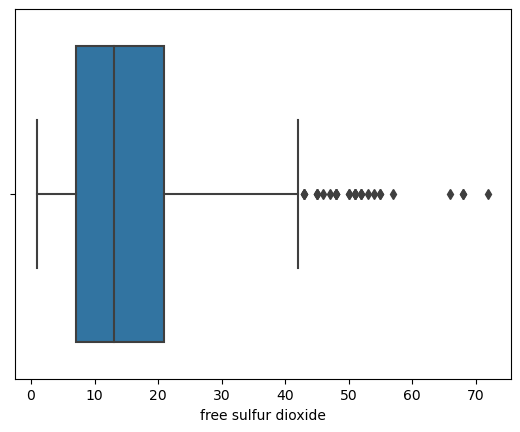

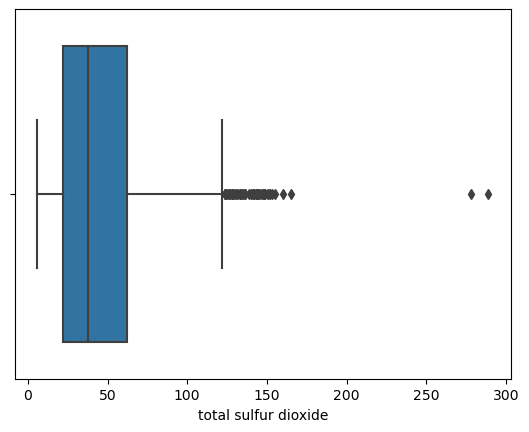

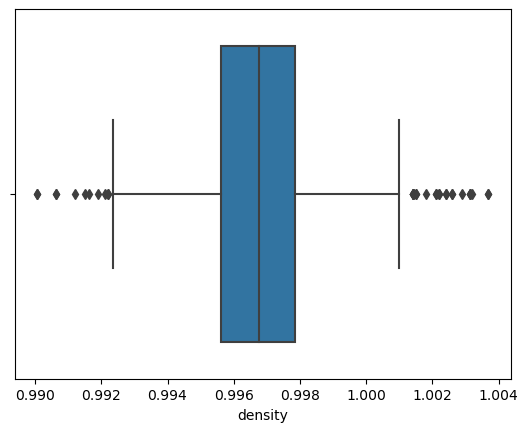

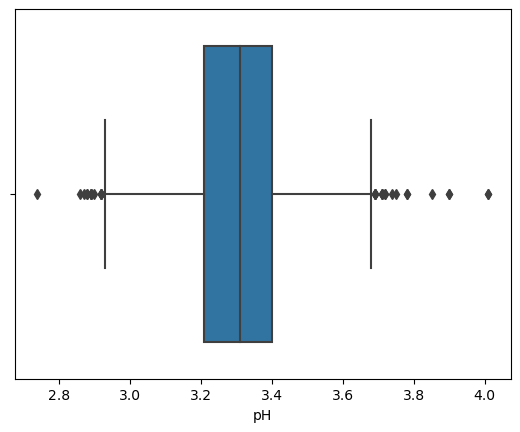

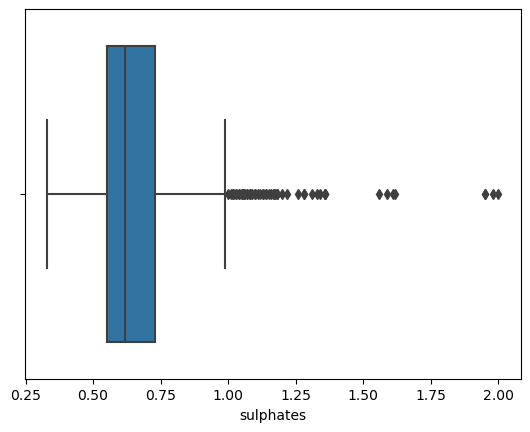

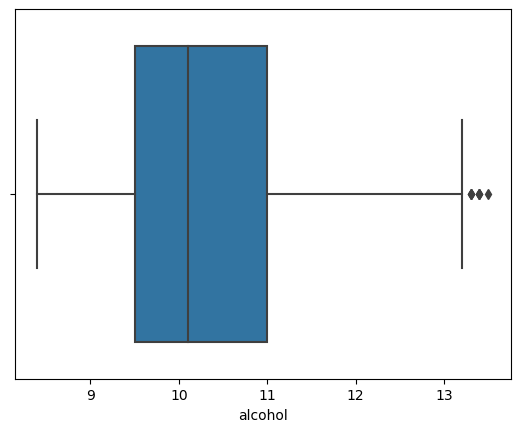

In [75]:
for i in numerical_cols:
    sn.boxplot(x=df_new[i]) 
    plt.show()

In [70]:
Q1 = df['density'].quantile(0.25)
Q3 = df['density'].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for outlier detection using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers based on IQR
df_no_outliers = df[(df['density'] >= lower_bound) & (df['density'] <= upper_bound)]

<Axes: >

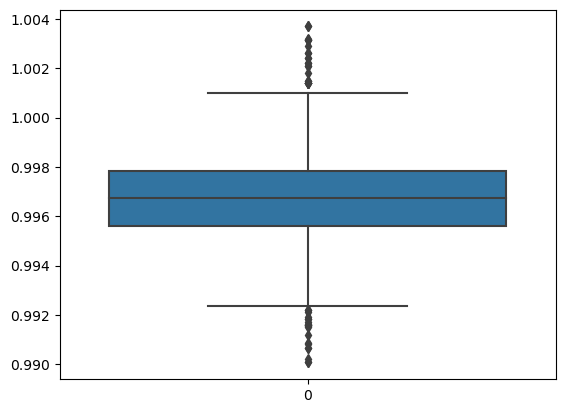

In [72]:
sn.boxplot(df['density'])

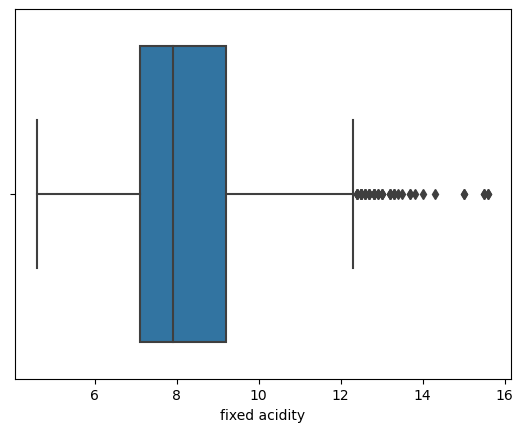

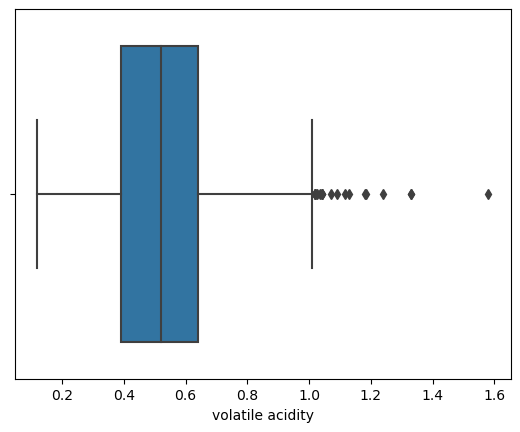

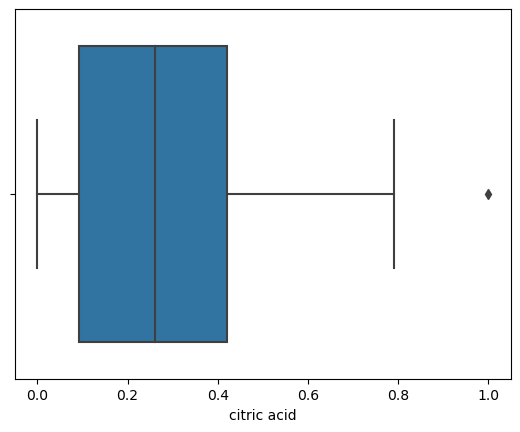

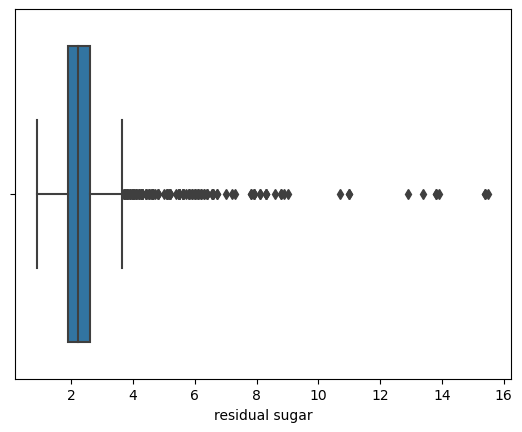

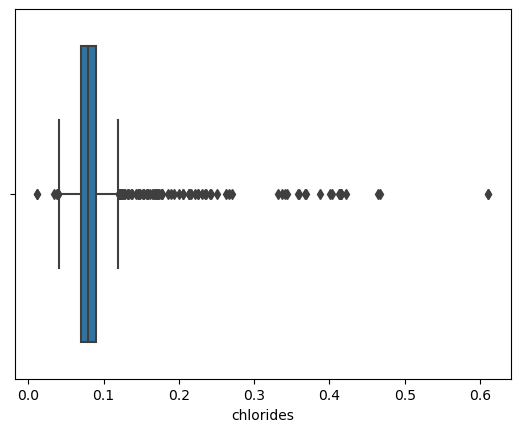

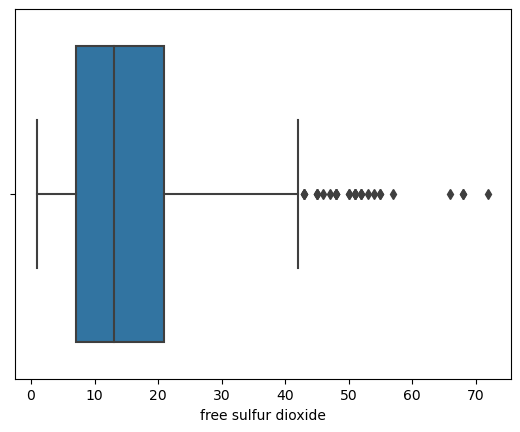

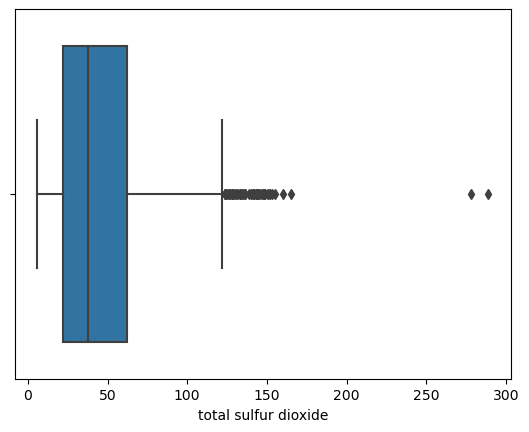

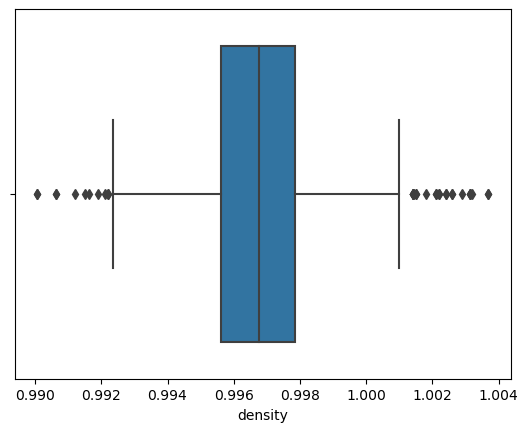

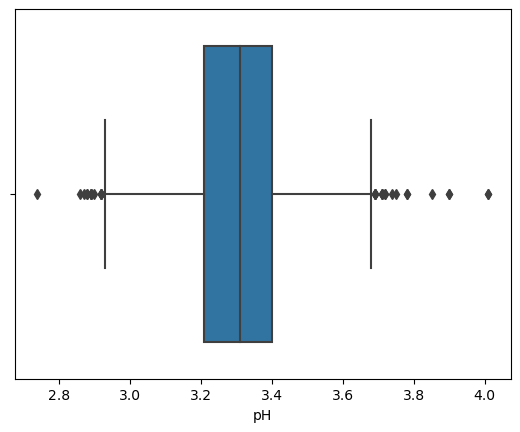

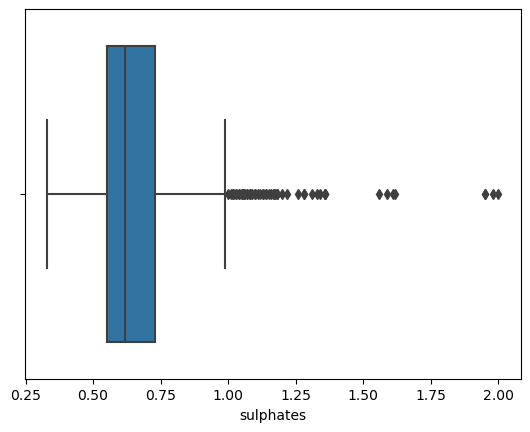

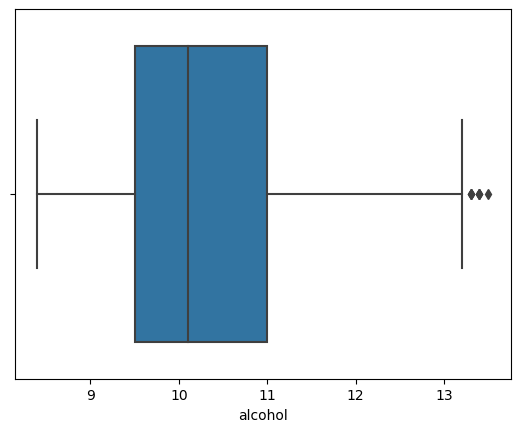

In [68]:
for i in numerical_cols:
    sn.boxplot(x=df_no_outliers[i]) 
    plt.show()

In [79]:
rf_model=RandomForestClassifier(n_estimators=200,random_state=1)
rf_model.fit(x_smote,y_smote['quality'])

RandomForestClassifier(n_estimators=200, random_state=1)

In [5]:
X.shape

(1599, 11)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
X2D = pca.fit_transform(X)


In [7]:
X2D.shape

(1599, 8)

In [11]:
pca.explained_variance_ratio_


array([9.46576976e-01, 4.83683046e-02, 2.58917183e-03, 1.51896798e-03,
       8.73553990e-04, 3.45607218e-05, 1.93627614e-05, 9.47278079e-06])

In [12]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

2

In [13]:
pca_g = PCA(n_components=0.95)
reduced_x=pca_g.fit_transform(X)
reduced_x.shape

(1599, 2)

In [10]:
X2D

array([[-1.32249050e+01, -2.02389981e+00, -1.12682053e+00, ...,
        -1.98017553e-01,  3.15474845e-02, -1.47050612e-01],
       [ 2.20377236e+01,  4.40832155e+00, -3.10377987e-01, ...,
        -3.01324964e-01,  2.23873766e-01,  1.43165060e-01],
       [ 7.16267333e+00, -2.50146086e+00, -5.81868296e-01, ...,
        -2.05113668e-01,  1.36190007e-01,  5.84800924e-02],
       ...,
       [-3.43135351e+00,  1.42712435e+01, -1.75071927e+00, ...,
         8.95128040e-02,  7.86224772e-02,  2.68348154e-02],
       [ 1.13287834e+00,  1.63161673e+01, -2.13441396e+00, ...,
         1.55484011e-02,  9.45607475e-02, -4.17320808e-02],
       [-3.87437660e+00,  3.12634754e+00, -1.87414925e+00, ...,
         4.00244077e-01, -1.61217682e-01,  9.01912976e-02]])

In [8]:
from sklearn.model_selection import train_test_split

In [14]:
dx_train,dx_test,y_train,y_test=train_test_split(reduced_x,y,test_size=0.2,random_state=2)

In [17]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=2)
x_smote,y_smote=smote.fit_resample(dx_train,y_train)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=200,random_state=1)
rf_model.fit(x_smote,y_smote['quality'])

RandomForestClassifier(n_estimators=200, random_state=1)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
preds=rf_model.predict(dx_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.04      0.11      0.06         9
           5       0.68      0.60      0.63       122
           6       0.69      0.52      0.59       147
           7       0.34      0.36      0.35        36
           8       0.04      0.20      0.07         5

    accuracy                           0.52       320
   macro avg       0.30      0.30      0.28       320
weighted avg       0.61      0.52      0.56       320



In [28]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
clf = Pipeline([
 ("kpca", KernelPCA(n_components=2)),
 ("log_reg",  RandomForestClassifier())
 ])
param_grid = [{
 "kpca__gamma": np.linspace(0.03, 0.05, 10),
 "kpca__kernel": ["rbf", "sigmoid"]
 }]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x_smote, y_smote['quality'])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', RandomForestClassifier())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [29]:
 print(grid_search.best_params_)


{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}


In [31]:
print(grid_search.best_estimator_)

Pipeline(steps=[('kpca', KernelPCA(gamma=0.05, kernel='rbf', n_components=2)),
                ('log_reg', RandomForestClassifier())])
